## Lab 2 - Abijith Suresh km - 8899968

### Part A

Use the **Lab2 dataset** provided. Load the dataset and split it into test and train. After that, train the model using Gaussian and Multinominal 
classifiers and post which model performs better. Use the trained model to perform some predictions on test data.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
lab2Data = pd.read_csv("Lab2_dataset.csv")
lab2Data.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
5,2949,ham,Subject: ehronline web address change\nthis me...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\nwe agr...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [67]:

# Prepare the features and target variables
X = lab2Data["text"]
y = lab2Data["label_num"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size and random_state as per your needs

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert text data to TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(), y_train)

# Train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Evaluate the performance of the models
gnb_accuracy = gnb.score(X_test_tfidf.toarray(), y_test)
mnb_accuracy = mnb.score(X_test_tfidf, y_test)

print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)

# Perform predictions on the test data using the best performing model
if gnb_accuracy > mnb_accuracy:
    predictions = gnb.predict(X_test_tfidf.toarray())
    model_name = "Gaussian Naive Bayes"
else:
    predictions = mnb.predict(X_test_tfidf)
    model_name = "Multinomial Naive Bayes"

print("Predictions using", model_name)
print(predictions)

Gaussian Naive Bayes Accuracy: 0.9497584541062802
Multinomial Naive Bayes Accuracy: 0.8772946859903382
Predictions using Gaussian Naive Bayes
[0 1 0 ... 1 0 0]


### Part B


Use this **air bnb new york city dataset** and remove outliers based on price per night for a given apartment/home.You can demonstrate why using other techniques like mean/median/ percentile works.The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.

In [68]:
airData = pd.read_csv("AB_NYC_2019.csv") 
airData.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [69]:
# Count the number of empty rows
nullValues = airData.isna().count
print(nullValues)

<bound method DataFrame.count of           id   name  host_id  host_name  neighbourhood_group  neighbourhood   
0      False  False    False      False                False          False  \
1      False  False    False      False                False          False   
2      False  False    False      False                False          False   
3      False  False    False      False                False          False   
4      False  False    False      False                False          False   
...      ...    ...      ...        ...                  ...            ...   
48890  False  False    False      False                False          False   
48891  False  False    False      False                False          False   
48892  False  False    False      False                False          False   
48893  False  False    False      False                False          False   
48894  False  False    False      False                False          False   

       latitude  l

{'whiskers': [<matplotlib.lines.Line2D at 0x13ae73c5350>,
 'caps': [<matplotlib.lines.Line2D at 0x13ae73c6f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x13ae73c6a90>],
 'medians': [<matplotlib.lines.Line2D at 0x13ae73c63d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13ae73c4e50>],
 'means': []}

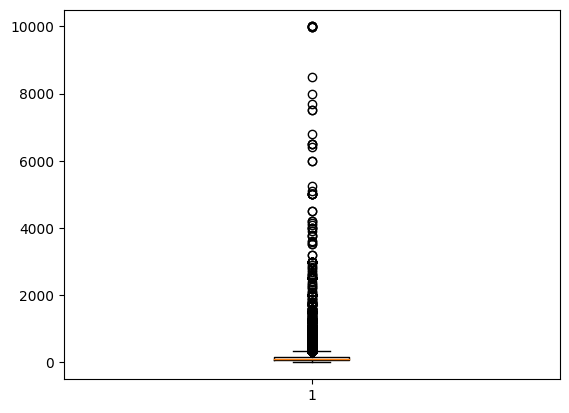

In [70]:
# Plot

plt.boxplot(airData["price"])

As we can see the outlier

Here im using IQR method to deal outliers

In [71]:
# Calculate the IQR
quartile1 = np.percentile(airData['price'], 25)
quartile3 = np.percentile(airData['price'], 75)
iqr = quartile3 - quartile1

lowerBound = max(min(airData['price']),(quartile1 - (1.5*iqr)))
upperBound = quartile3 + (1.5*iqr)
print(lowerBound)
print(upperBound)

0
334.0


In [72]:
# Identifying the outliers

outliers = airData[(airData['price'] < lowerBound) | (airData['price'] > upperBound)]

# Print the outliers
print("Outliers:", outliers[['id','price']])

# List of ids to delete
outlierIds = list(outliers['id'])

Outliers:              id  price
61        15396    375
85        19601    800
103       23686    500
114       26933    350
121       27659    400
...         ...    ...
48758  36420289    350
48833  36450896    475
48839  36452721    800
48842  36453160    350
48856  36457700    345

[2972 rows x 2 columns]


In [73]:
# Delete rows based on outliers list
filterDataFrame = airData[~airData['id'].isin(outlierIds)]
len(filterDataFrame)
price_mean = filterDataFrame['price'].mean()
price_median = filterDataFrame['price'].median()

In [78]:
cleanedDF = filterDataFrame['price'].describe()

cleanedDF


count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64

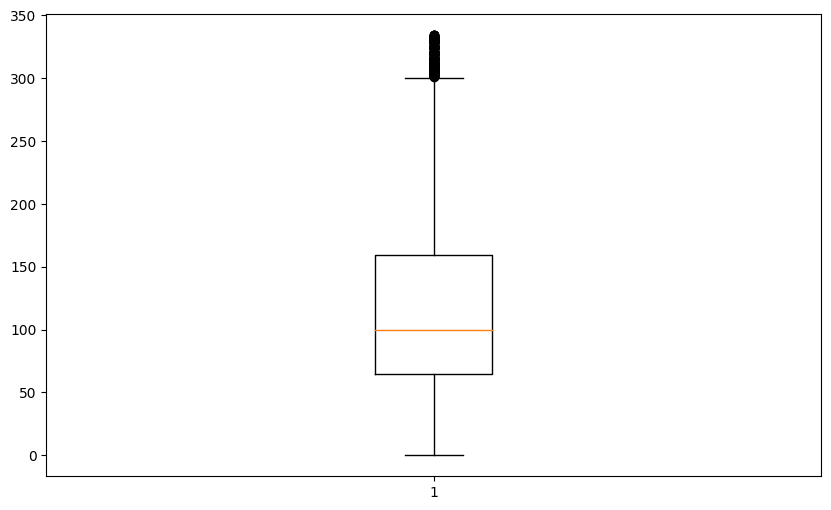

In [79]:
# Plotting after IQR

fig = plt.figure(figsize =(10,6))
plt.boxplot(filterDataFrame['price'])
plt.show()